<a href="https://colab.research.google.com/github/Ghaliah27/data-engineering/blob/master/Data_Science_Practicum_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Factors that Influence Household Income in the United States

##Project Description

This project is meant to investigate the factors that influence the household income in the United States. Different households have different levels of income. There are several factors that are said to be having a large impact on the household income. This project is meant to investigate such factors and the level to which they contribute in predicting household income.



# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas.plotting import scatter_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set()
#initialize the defalust seaborn setting to make minimal and good lookin plot

# Reading the Data

In [ ]:
df = pd.read_csv("adult_data.csv", header = None)
df11 = pd.read_csv("adult_test.csv", skiprows = 1,  header = None)

## Handling Missing Values
Missing values are represented by "?". We can see various "?" in work class, occupation, and native country column. These are nothing but some missing values. Missing values make the data faulty, so it's better to deal with it. One of the ways to deal with missing value is to delete that whole row.  It doesn't affect the data until the data is either for regression analysis or a time series. Pandas provide a built-in dropna method to deal with the Nan values, but we don't have Nan we have "?" in the data. Any how we have to deal with the missing values or nan values because we cannot the data into the model with nan values or missing values. My way to deal with it is firstly replacing the “?" points in the data by nan values and then using pandas built-in dropna method to drop the whole row.

In [ ]:
for i in range(len(df.columns)):
    for j in range(len(df[i])):
        if df[i][j] == " ?":
            df[i][j] = np.NaN
            
            
            
for i in range(len(df11.columns)):
    for j in range(len(df11[i])):
        if df11[i][j] == " ?":
            df11[i][j] = np.NaN




## Data has no column 

The dataset has no columns. So I had to manually write the name of columns from the data description at UCI machine learning data repository.

In [ ]:
cols = ["age", "workclass", "fnwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "target"]
df.columns = cols
df11.columns = cols

## Finding NaN Values

Now counting all the NaN values from  all the columns and seeing them.

In [ ]:
print("on train data\n")
for i in df.columns:
    print("in column {} nan values = {}".format(i, df[i].isna().sum()))
print("\non test data\n")
for i in df11.columns:
    print("in column {} nan values = {}".format(i, df11[i].isna().sum()))

on train data

in column age nan values = 0
in column workclass nan values = 1836
in column fnwgt nan values = 0
in column education nan values = 0
in column education-num nan values = 0
in column marital-status nan values = 0
in column occupation nan values = 1843
in column relationship nan values = 0
in column race nan values = 0
in column sex nan values = 0
in column capital-gain nan values = 0
in column capital-loss nan values = 0
in column hours-per-week nan values = 0
in column native-country nan values = 583
in column target nan values = 0

on test data

in column age nan values = 0
in column workclass nan values = 963
in column fnwgt nan values = 0
in column education nan values = 0
in column education-num nan values = 0
in column marital-status nan values = 0
in column occupation nan values = 966
in column relationship nan values = 0
in column race nan values = 0
in column sex nan values = 0
in column capital-gain nan values = 0
in column capital-loss nan values = 0
in column 

## Droping NaN Values

Using pandas Dropna method to delete the row for which it finds the nan values.

In [ ]:
df.dropna(axis = 0, inplace = True)
df.reset_index(drop=True, inplace = True)

df11.dropna(axis = 0, inplace = True)
df11.reset_index(drop=True, inplace = True)

## Filtering data for non US households

My project is going to analyse the data for US households, but the data that I got had some data points from other countries too. so I had to filter them out and then analyze the data.

In [ ]:
for i in range(len(df["native-country"])):
    if df["native-country"][i] != " United-States":
        df.drop([i], inplace = True)
        
for i in range(len(df11["native-country"])):
    if df11["native-country"][i] != " United-States":
        df11.drop([i], inplace = True)

# Visualization

Visualization is very important step of any data science project. It helps to understand the data and find some irregularities in the data (if any). Looking at the visuals of the data helps us to find the skewness, and distribution, outlier, correlation and such ither things. If there is something wrong, we can deal with them in the preprocessing step of the data.
Here  I'm looking at the correlation of the numerical columns to look at the relationship between deferent attributes of the data.

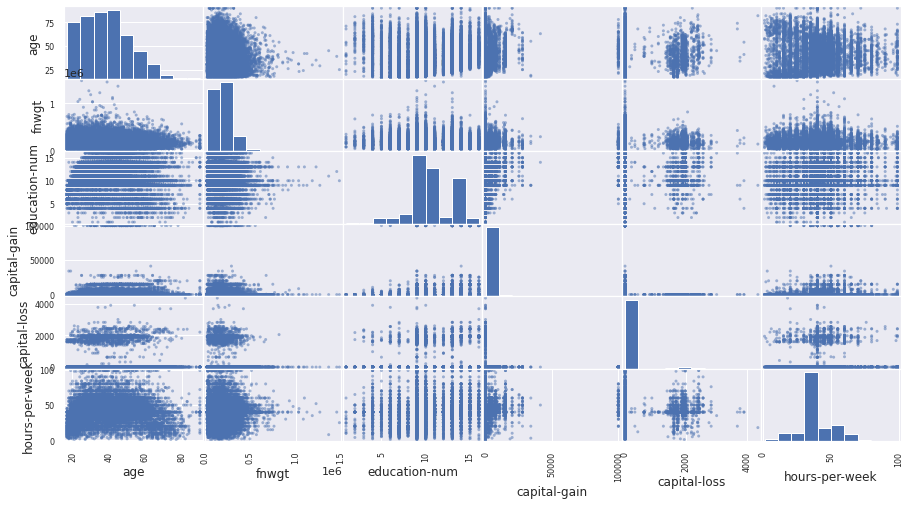

In [ ]:
corr_plt = df#[['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex',"target"]]
scatter_matrix(corr_plt, figsize = (15, 8)) 
plt.show()




### Observation from the visual

This visual shows the relationship between all the numerical columns. Here we cannot see any kind of linear relationship between these columns. We can say that the data has no multicollinearity.

The bar graph in the diagonal shows the distribution of the data. Here we can see that the columns such as fnwgt, capital-gain, capital-loss are skewed towards zero values. This indicates that most of the values in this column has very low value. They are so close to zero, and the distribution of other features are fine

In [ ]:
df.reset_index(drop=True, inplace = True)
df11.reset_index(drop=True, inplace = True)
# since we are only concedering the us households and i have already filtered them out. 
#so now deleting that whole column. because it ontains only one value, that is us households
df.drop(["native-country"], axis = 1, inplace = True)
df11.drop(["native-country"], axis = 1, inplace = True)
## since the machine learning model needs all kinds of data into numerical form. pandas has read all the number as string.
#the numerical values that we are seeing there are not numerical they are just number as string. so chenging them back to numbers
df[['age', 'fnwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = df[['age', 'fnwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].apply(pd.to_numeric)
df11[['age', 'fnwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = df11[['age', 'fnwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].apply(pd.to_numeric)

#### Visualizing the counts of each class. to see whether or not the data is balanced for both classes. As if the data is unbalanced, it may lead the model to be biased towards the higher number of class.

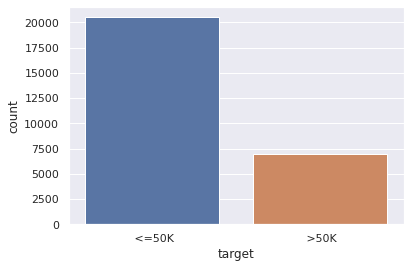

In [ ]:
sns.countplot(df["target"])

We can see that the class labels are not distributed equally across these two classes. The class 0(<=50k) has values more than 20000, and class 1(>50k) has values approximately 7400. This is the ratio of less than 3:1(approximately) which is fine. We don't need to down sample the class 0(<=50k)

# Data Analysys
looking at the change in various numerical variables corresponding to both of the classes.

In [ ]:
df.pivot_table(columns = ["target"], aggfunc = "mean")

target,<=50K,>50K
age,36.629724,44.000429
capital-gain,150.089912,3965.694353
capital-loss,54.659418,194.689207
education-num,9.756887,11.586276
fnwgt,186921.131893,187447.492781
hours-per-week,39.340826,45.750536


# Encoding the labels

Encoding the categorical column into numerical variable. Since the machine learning model needs all kinds of data into numerical form, we need to change these categorical columns into numerical categories, and change the categorical data into numerical values. 

In [ ]:
cols = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex',"target"]
for col in cols:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

cols = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex',"target"]
for col in cols:
    le = preprocessing.LabelEncoder()
    le.fit(df11[col])
    df11[col] = le.transform(df11[col])

The correlation heatmap shows the visual and corresponding value of the linear relationship between the deferent variables. We can see in the plot below that there is not significant correlation between the variables so everything seems fine so far.


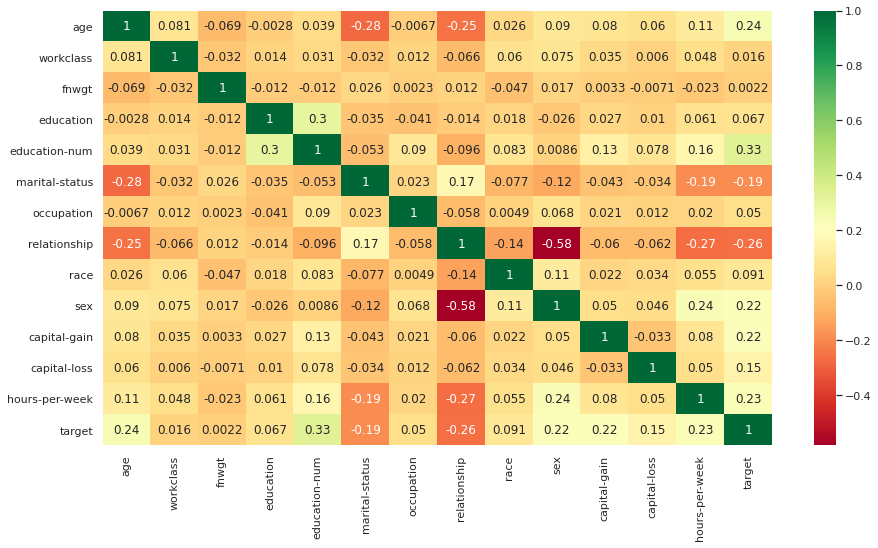

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

# Statistical Measure for Feature Importance
### Mean percentage rise from class 0 to class 1 for each attribute.
Percentage change (+ive change = %rise in value) in the mean value of the features. It is just a simple statistical way to see which feature is changing the most when changing the class. That variable always plays big role in the classification of the data.


In [ ]:
dff = df.pivot_table(columns = ["target"], aggfunc = "mean")
dff["%rise"] = (dff[1]-dff[0])/dff[0]
dff.sort_values(by = "%rise", ascending = False)

target,0,1,%rise
capital-gain,150.089912,3965.694353,25.422125
capital-loss,54.659418,194.689207,2.561860
sex,0.614413,0.853610,0.389309
age,36.629724,44.000429,0.201222
education-num,9.756887,11.586276,0.187497
hours-per-week,39.340826,45.750536,0.162928
occupation,5.850846,6.320944,0.080347
education,10.307133,10.881630,0.055738
race,3.695646,3.852466,0.042434
workclass,2.193281,2.229736,0.016621


In [ ]:
x = df[['age', 'workclass', 'fnwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week',]]
y = df["target"]


x_test = df11[['age', 'workclass', 'fnwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week',]]
y_test = df11["target"]

In [ ]:
c = ['age', 'workclass', 'fnwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week']

##Chi-square test

Using Chi-square test to select k best features. This is a simple statistical measure. In this project, we calculate the chi-square value between each attribute and output. It gives us the strength of the relationship, and shorten them in decreasing order to get the k best features.

        Attributes         Score
10    capital-gain  6.777215e+07
11    capital-loss  1.132976e+06
2            fnwgt  7.725636e+03
0              age  7.359449e+03
12  hours-per-week  5.230422e+03
7     relationship  3.266992e+03
4    education-num  1.707678e+03
5   marital-status  8.827337e+02
9              sex  4.419603e+02
6       occupation  1.930672e+02
3        education  1.646872e+02
8             race  3.433906e+01
1        workclass  3.147118e+00


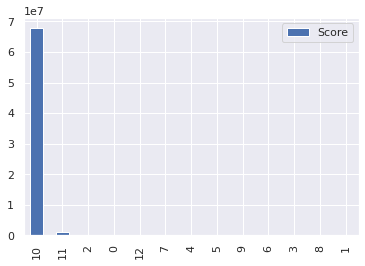

In [ ]:
#select k best featues based on feature importance
bf = SelectKBest(score_func=chi2, k=13)
fit = bf.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concatination of socre and column names
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']# columns are attributes and corresponding importance score
print(featureScores.sort_values('Score',  ascending = False))
featureScores.sort_values('Score',  ascending = False).plot(kind='bar') # ploting the importance in a bar graph
plt.show()

## *Linear Correlation*
Seeing the linear correlation of each variable with the output and sorting them in descending order.

In [ ]:
df3 = pd.DataFrame(df.corr()["target"])
df3.sort_values(by = "target", ascending = False )

,target
target,1.000000
education-num,0.334905
age,0.243460
hours-per-week,0.231819
sex,0.222442
capital-gain,0.221281
capital-loss,0.149293
race,0.090976
education,0.066689
occupation,0.050307


# Machine Learning model for feature Importance

further using machine learning model to calculate feature importance

in case of tabular data the feature importance can be calculated. it is a model inspection technique, that we use for fitted estimator. this method become more usefull in case of non-linear estimators. it is calculated by the method that when we randomly shuffle the featue values and it breaks the relationship from the target value. that means it importance score decrease. it results in drop in the accuracy score of the mdoel. it tells us that how much model was dependent on this feature. thsi is how we calculate the importace of teh feature. it can be don independently for many features and calculate the impoprtance of all the features.

The permutation_importance function calculates the feature importance of estimators for a given dataset. you can sets the number of times a feature is randomly shuffled and returns a sample of feature importances.

### Permutation feature importance

In [ ]:
clf = LogisticRegression().fit(x, y)
result = permutation_importance(clf, x, y, n_repeats=1, random_state=0)

In [ ]:
df0 = pd.DataFrame(result.importances, columns = ["Importance"])
df0["feature"] = c
df0.sort_values('Importance',  ascending = False)

,Importance,feature
10,0.070244,capital-gain
11,0.022978,capital-loss
5,0.000109,marital-status
4,0.000036,education-num
7,0.000036,relationship
1,0.000000,workclass
6,0.000000,occupation
8,0.000000,race
9,0.000000,sex
3,-0.000073,education


# Decision Tree

using decision Tree classifier to select the fearure importance and sort them in decending order.

[0.13762313 0.03832325 0.21935848 0.01566452 0.09764188 0.00893224
 0.06212527 0.19585281 0.01077423 0.00354835 0.10448783 0.03558834
 0.07007968]


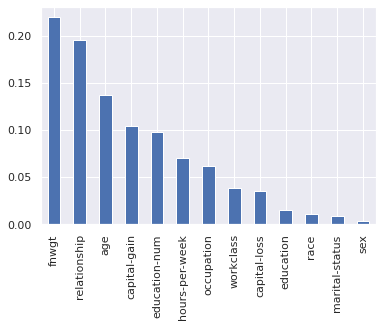

In [ ]:
# using entropy to select the best features to devide at the root node in the tree
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(x,y)
print(model.feature_importances_) # feature importance
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

feat_importances.nlargest(13).plot(kind='bar')
plt.show()

# Machine Learning Model for prediction

using the machine learning model to train and test the model on the corresponding train and test data.

In [ ]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# KNN for prediction

Maximum accuracy:- 0.8312972658522396 at K = 11


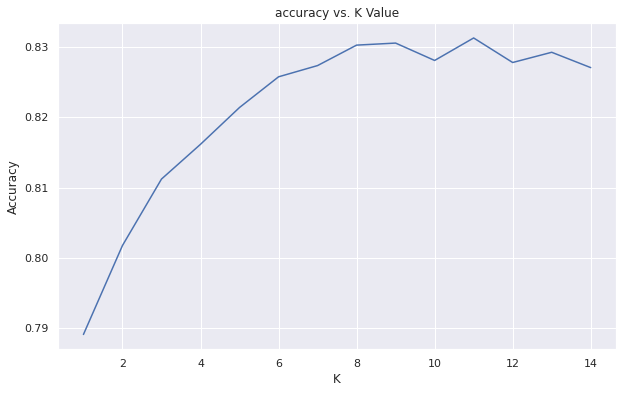

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors =i, metric = 'minkowski', p = 2).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

# Decision Tree for prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
Y_pred = classifier.predict(X_test)
CM = confusion_matrix(Y_test, Y_pred)
print('confusion matrix =')
print(CM)

confusion matrix =
[[4408  699]
 [ 649 1120]]


In [ ]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.803955788248982

# support vector machine for prediction

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred = classifier.predict(X_test)
CM = confusion_matrix(Y_test, Y_pred)
print('confusion matrix =')
print(CM)

confusion matrix =
[[4934  173]
 [1205  564]]


In [ ]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.7995927865037813

# Final Model

### Now that we have seen that KNN is giving the best accuracy. i am using that to make the final model

In [ ]:
#final classifier

classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:

y_pred = classifier.predict(x_test)
CM = confusion_matrix(y_test, y_pred)
print('confusion matrix =')
print(CM)

confusion matrix =
[[9904  431]
 [2598  855]]


In [ ]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.7803162170002901

# Final Obsrvation

### Feature Importance

I have used multiple techniques for the feature importance of the model. and they give different results. I have used permutation feature importance, chi square test. and some more machine learning and statistical models to give feature importance. but i think the most accurate real importance is given by the Decision Tree importance score. Because the decision tree handles both categorical and continuous data very well, the condition of our data is the same, and the final importance score can be the one given by the decision tree model.


### Machine Learning Model For Prediction

Once we are done with calculating the feature importance, the task is to predict the classes for the test data. We have two chunks of data train and test. I further divided the train data into train and validation. I used this division for making the model and testing the accuracy. I did this with 3 machine learning models;
- Decision tree
- KNN(k-nearest neighbor)
- SVM(support vector machine)

I have used an iterative method to select the best value for k. Out of these three models, the KNN was giving us the best accuracy in that case. Then I used the knn model with the tuned parameter (k = 11). On the test data, the final KNN model is giving the accuracy of 78% and predicts the household income with the given accuracy.


#References

https://archive.ics.uci.edu/ml/datasets/census+income
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/permutation_importance.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance


